Quick notebook to test and show the `tsa` module. The `acf` and `pacf` functions give the exact same results as their R equivalents.

In [1]:
import tundraden as td
import statsmodels.tsa.stattools
import numpy as np
import matplotlib.pyplot as plt

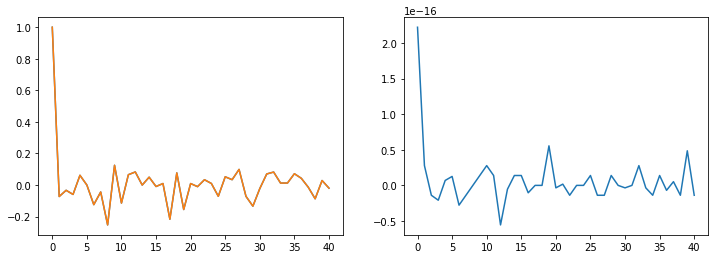

In [2]:
x = np.random.randn(100)
acf1 = td.tsa.acf(x)
acf2 = statsmodels.tsa.stattools.acf(x, fft=False)  # setting fft to False to avoid a FutureWarning

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(acf1)
plt.plot(acf2)
plt.subplot(1,2,2)
plt.plot(acf1-acf2)
plt.show()

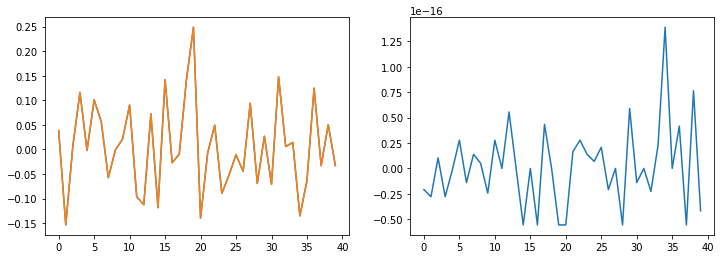

In [3]:
x = np.random.randn(100)
pacf1 = td.tsa.pacf(x)
pacf2 = statsmodels.tsa.stattools.pacf(x, min(len(x)-1,40), method='ywm')[1:]
# setting method to 'ywm', which is not the default, gives the exact same result as in R

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(pacf1)
plt.plot(pacf2)
plt.subplot(1,2,2)
plt.plot(pacf1-pacf2)
plt.show()

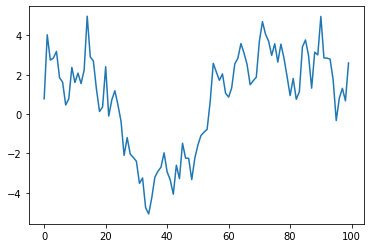

In [4]:
x = td.tsa.generate_arma_samples([1, -0.9], [1], 100)
plt.figure()
plt.plot(x)
plt.show()

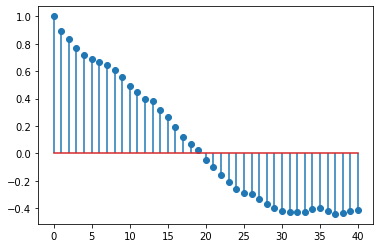

In [5]:
plt.figure()
td.display.acf(x)
plt.show()

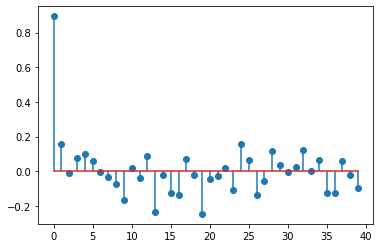

In [6]:
plt.figure()
td.display.pacf(x)
plt.show()